In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os

import matplotlib
import matplotlib.backends.backend_pdf

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [2]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'graham_output_cats/'

In [5]:
# the output catalogs (after photoz and mass runs)
cat_output_no_irac_nir_mass_name = output_dir+'cat_out_nonirirac_il_formass.fits'
cat_output_no_irac_mass_name = output_dir+'cat_out_noirac_il_formass.fits'
cat_output_no_nir_mass_name = output_dir+'cat_out_nonir_il_formass.fits'
cat_output_full_mass_name = output_dir+'cat_out_15band_il_formass.fits'
cat_names = [cat_output_no_irac_nir_mass_name, cat_output_no_irac_mass_name, cat_output_no_nir_mass_name, cat_output_full_mass_name]
filter_selections = ['no nir\&irac','no irac / with nir','no nir / with irac','full']

In [6]:
for i,cat_name in enumerate(cat_names):    
    cat_output_name = cat_name; print(cat_name)
    cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits'
    combined_cat_name = cat_output_name.replace('.fits','c20added.fits')
    
    col_list = "'RA DEC MASS_MED'"
    cmd = 'java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0\
       in1='+cat_output_name+' values1="RA DEC" \
       in2='+cat_c20_name+' values2="ALPHA_J2000 DELTA_J2000" \
       in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC" \
       out='+ combined_cat_name+' icmd3="keepcols '+col_list+'" '
    print(cmd)
    os.system(cmd)
    
    if i==0:
        cat_matched = Table.read(combined_cat_name)
        cat_matched = cat_matched[cat_matched['lp_zPDF']>0]
        cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
                 ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
        cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
        cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
        cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
        cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
        cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
        flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

        cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
        cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
        cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
        cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
        flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

        cond_ch1 = ( (cat_matched['MAG_AUTO_CH1_CORR'] > 0.) & (cat_matched['MAG_AUTO_CH1_CORR'] < 50.) & (cat_matched['MAGERR_AUTO_CH1_CORR'] > 0.) & (cat_matched['MAGERR_AUTO_CH1_CORR'] < 0.5) )
        cond_ch2 = ( (cat_matched['MAG_AUTO_CH2_CORR'] > 0.) & (cat_matched['MAG_AUTO_CH2_CORR'] < 50.) & (cat_matched['MAGERR_AUTO_CH2_CORR'] > 0.) & (cat_matched['MAGERR_AUTO_CH2_CORR'] < 0.5) )
        flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 
        
        flag_list = [flag_optical,flag_nir,flag_irac,flag_nir]
        flag_name_list = ['flag optical','flag nir','flag irac',' flag nir']
        
        if len(cat_matched) != len(flag_optical) or len(cat_matched) != len(flag_nir) or len(cat_matched) != len(flag_irac):
            print('lengths do not match')
        else:
            print(len(cat_matched))

/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_nonirirac_il_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_nonirirac_il_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits values2="ALPHA_J2000 DELTA_J2000"        in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC"        out=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_nonirirac_il_formassc20added.fits icmd3="keepcols 'RA DEC MASS_MED'" 


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


29266
/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_noirac_il_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_noirac_il_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits values2="ALPHA_J2000 DELTA_J2000"        in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC"        out=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_noirac_il_formassc20added.fits icmd3="keepcols 'RA DEC MASS_MED'" 
/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_nonir_il_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_nonir_il_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2

#### plots

In [7]:
massive_cut = 11.2

In [20]:
for i,cat_name in enumerate(cat_names):
    cat_output_c20added = Table.read(cat_name)
    print(cat_output_c20added[2]['RA'])
    print(len(cat_output_c20added))

149.86617893208532
30000
149.86153573700625
30000
149.87697933171182
30000
150.1619837208989
30000


29266 29266
29264 29264
29269 29269
29276 29276
29266 29266
29264 29264
29269 29269
29276 29276
29266 29266
29264 29264
29269 29269
29276 29276
29266 29266


ValueError: operands could not be broadcast together with shapes (29264,) (29266,) 

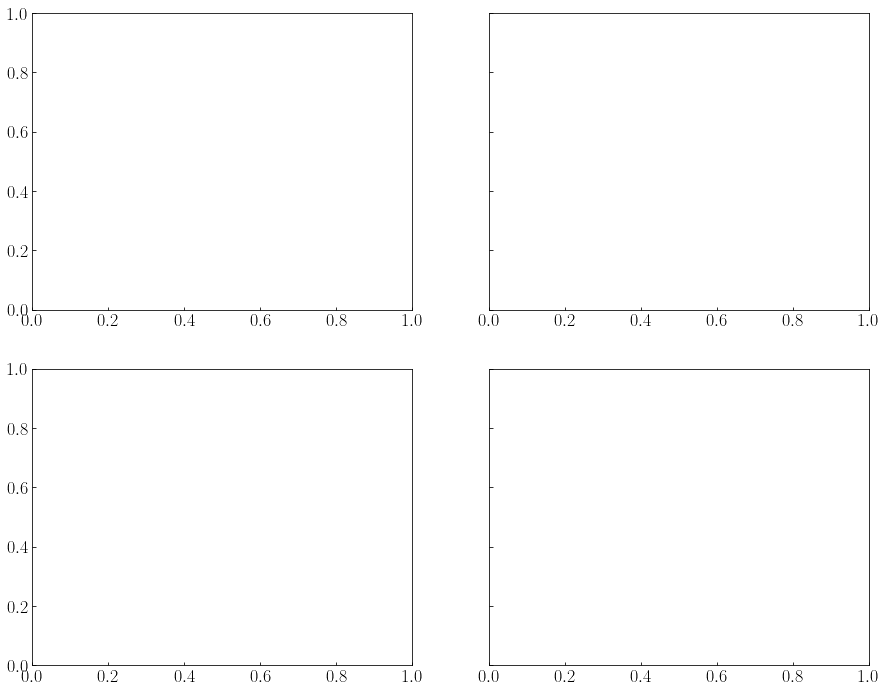

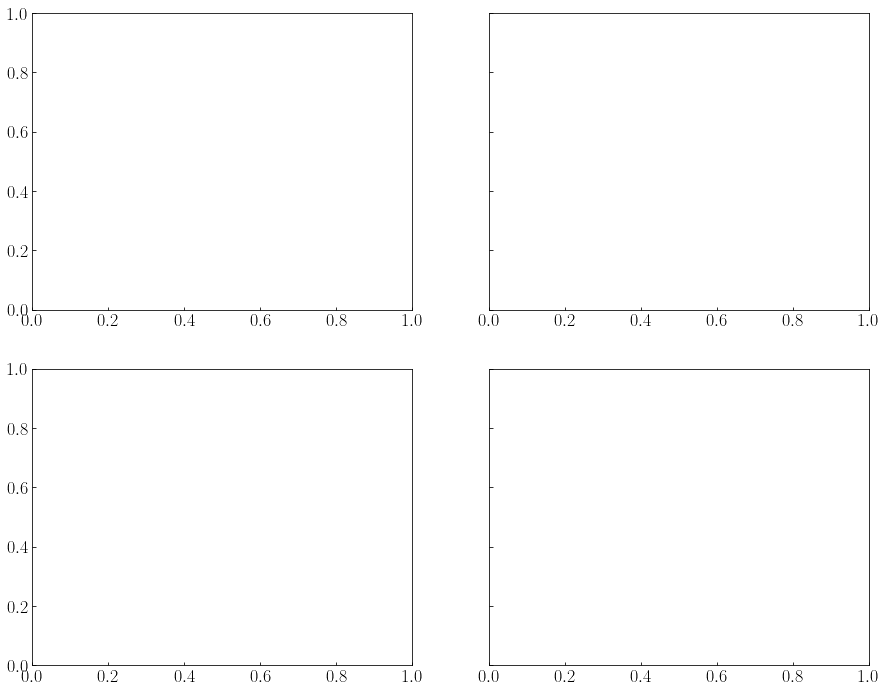

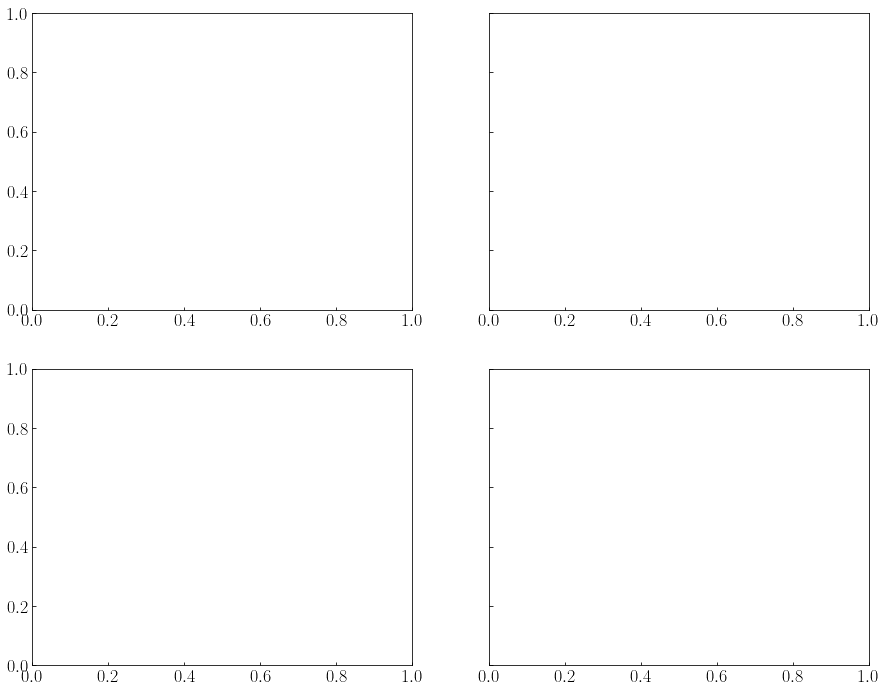

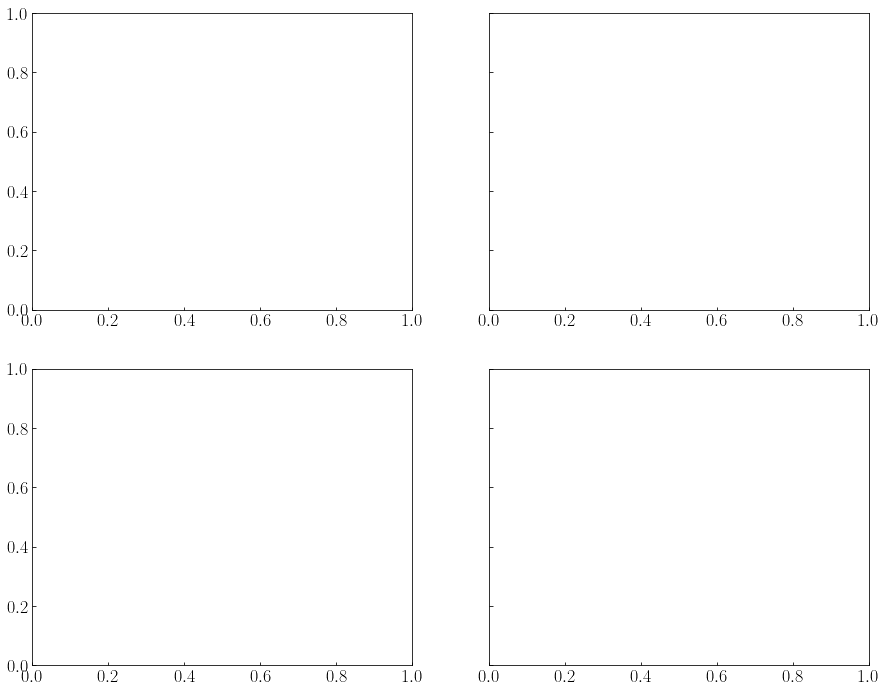

In [15]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_photoz_comparison.pdf")
for selection in ['all','massive','massive_c20','fake_massive']:
    fig, axs = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
    for i,cat_name in enumerate(cat_names):
        row = i // 2
        col = i % 2
        cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
        cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
        
        # select subsample
        if selection == 'all':
            cond = np.ones(len(cat_output_c20added)).astype(bool)
            fig_title = 'All Galaxies ($i<26$)'
        elif selection == 'massive_c20':
            cond = (cat_output_c20added['lp_mass_med']>massive_cut)
            fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>'+str(massive_cut)+'$)'
        elif selection == 'massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)
            fig_title = 'My Massive Galaxies ($\log(M_{myrun})>'+str(massive_cut)+'$)'
        elif selection == 'fake_massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<massive_cut-0.5)
            fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>'+str(massive_cut)+' ~ \& ~ \log(M_{C20}/M_\odot)<'+str(massive_cut-0.5)+'$)'
        else:
            raise NameError('wrong name')
        
        print(len(cond),len(cat_output_c20added))
    
        # plot
#         if i==0: print('Number of objects:',len(cond[cond]))
#         im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'], cat_output_c20added[cond]['Z_BEST'],s=6,c=flag_list[i][cond],alpha=0.8,cmap='Paired')
#         axs[row][col].plot([0,6],[0,6],'--k',alpha=0.3,zorder=0)
#         axs[row][col].set_xlim([0,6])
#         axs[row][col].set_ylim([0,6])
#         axs[row][col].set_xlabel(r'$z_{C20}$',fontsize=21)
#         axs[row][col].set_ylabel(r'$z_{myrun}$',fontsize=21)
#         axs[row][col].grid()
#         cbar = fig.colorbar(im, ax=axs[row][col])
#         cbar.ax.set_ylabel(flag_name_list[i],fontsize=19)
    
#         # print out outlier fraction
#         outlier_factor = 0.15
#         num_outliers_15 = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['lp_zPDF']-cat_output_c20added[cond]['Z_BEST'])>outlier_factor*(1+cat_output_c20added[cond]['lp_zPDF'])])
    
#         axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
#         axs[row][col].annotate('$\eta=$'+str(round(num_outliers_15/len(cat_output_c20added[cond])*100,1))+'\% '+'('+str(len(flag_list[i][cond]))+')',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
#     plt.suptitle(fig_title,fontsize=22)
#     plt.tight_layout(pad=4,w_pad=-1.5)
#     pdf.savefig( fig )
pdf.close()